# El objetivo de este cuaderno es mostrar un resumen de los scripts


Vamos a comenzar visualizando los distintos ficheros de datos que tenemos en la carpeta `datos`, que meteremos en la lista **archivos**. Además vamos a importar el script `funciones.py` para poder utilizar todas las funciones de ese script.

In [1]:
from funcionesdef import*
import os 


carpeta_datos = 'datos'
archivos = [os.path.join(carpeta_datos, archivo) for archivo in os.listdir(carpeta_datos) if os.path.isfile(os.path.join(carpeta_datos,archivo))]
archivos.remove('datos/read.txt')
archivos

['datos/VIGO359A00.22O',
 'datos/BADJ122A00.22O',
 'datos/MAD1060A0030s.23O',
 'datos/MAD1047A00.23O',
 'datos/TERU042A00.23O',
 'datos/PENI168A00.22O',
 'datos/GRA1065Q00.23O',
 'datos/MAD1060R001s.23O']

En primer lugar, realizaremos un análisis gráfico de los datos relacionados con los satélites de un archivo específico con el objetivo de visualizar y comprender mejor la información. Este enfoque es ampliamente utilizado en la práctica para examinar y representar los datos satelitales de manera visual.

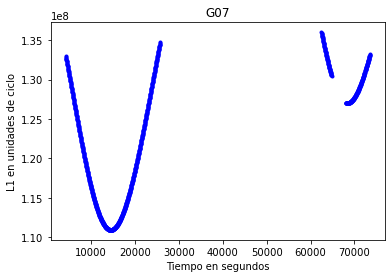

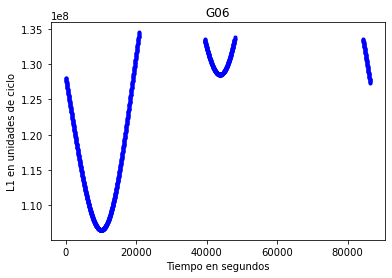

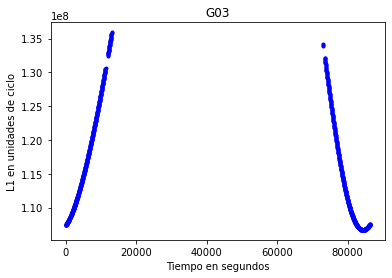

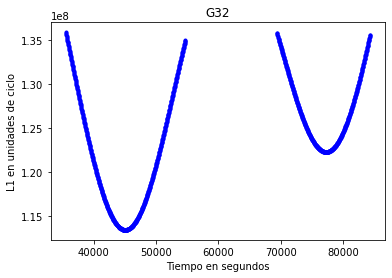

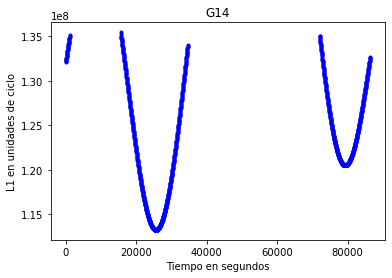

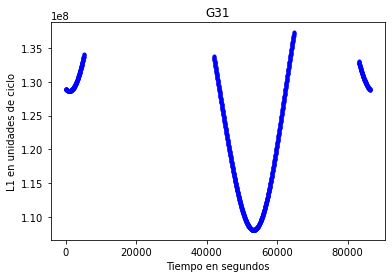

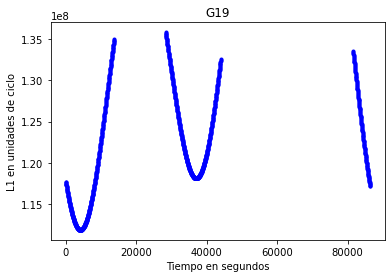

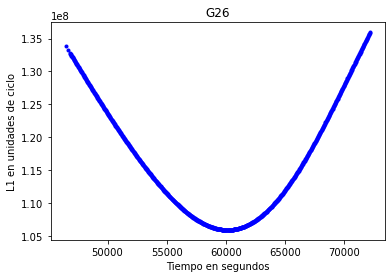

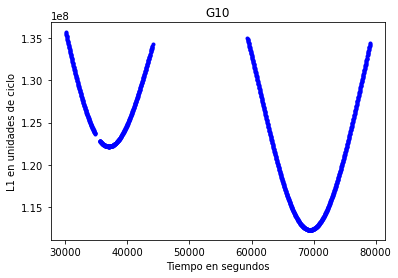

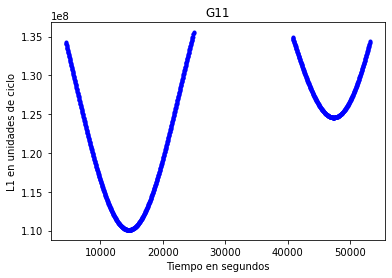

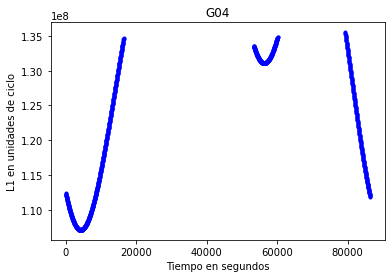

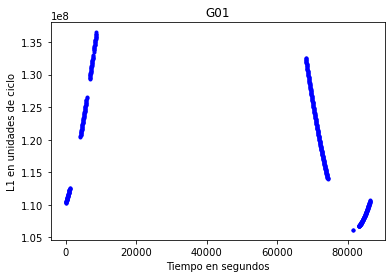

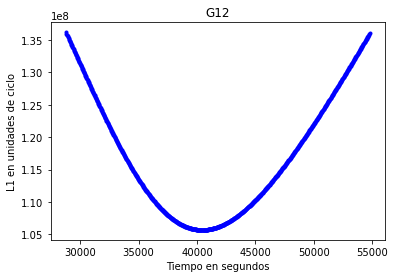

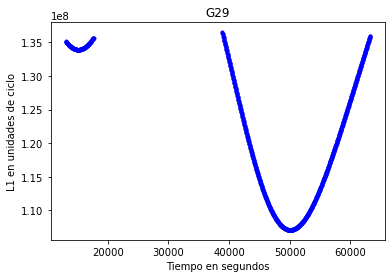

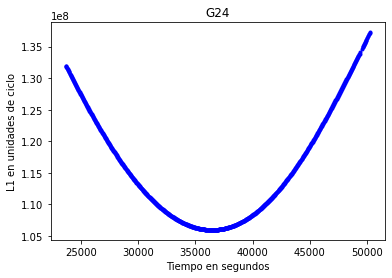

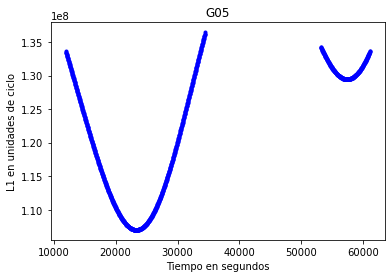

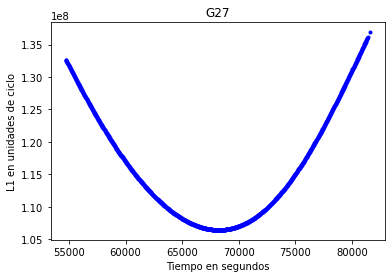

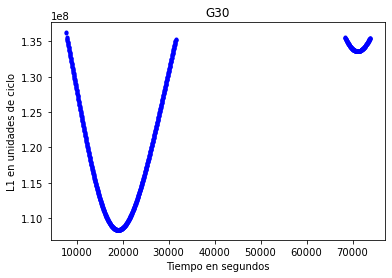

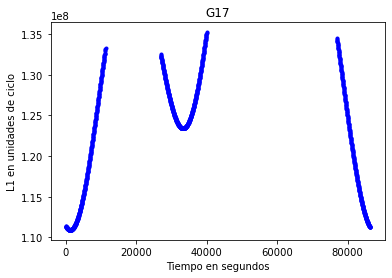

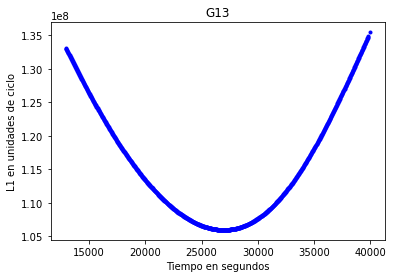

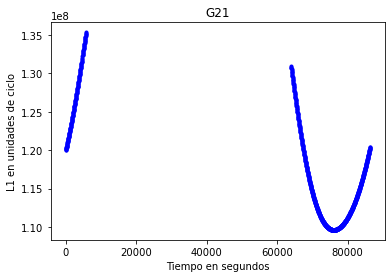

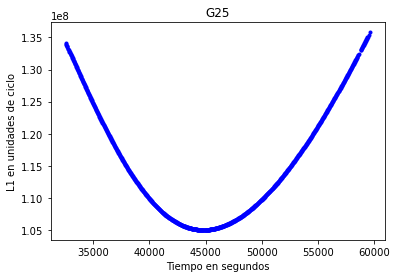

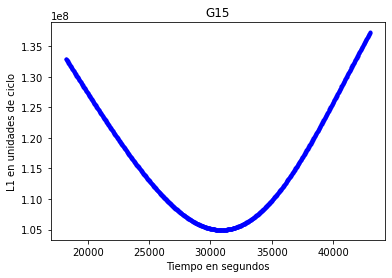

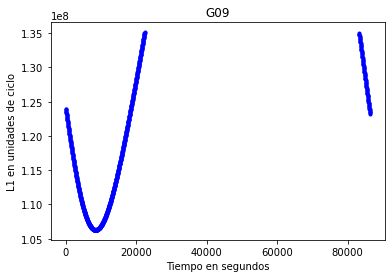

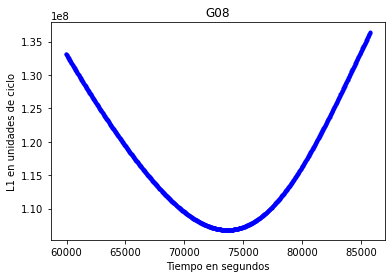

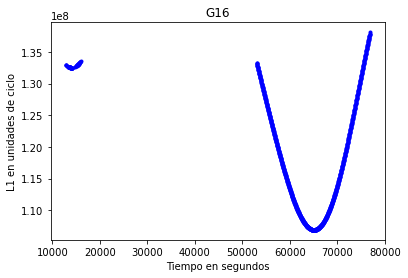

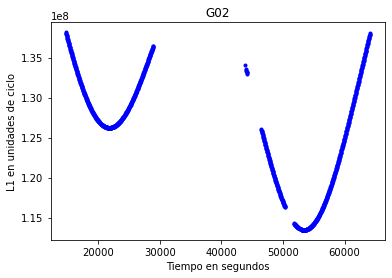

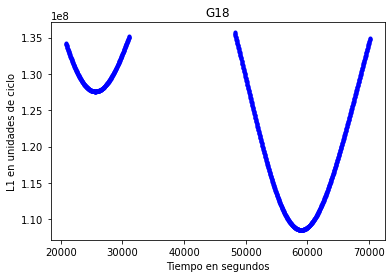

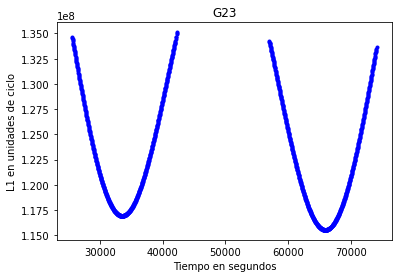

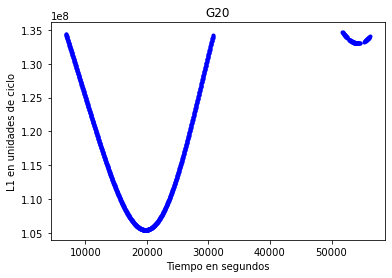

In [2]:
Madrid='datos/MAD1047A00.23O'
dict_Granada = all_information2(Madrid)
graficar_frec(Madrid,3,30)

#### Método basado en la estimación polinomial

* Método1: utiliza un polinomio para cada 10 valores y establece el umbral en relación a este. 

* Método2: calcula los residuos de los polinomios divididos de 10 en 10 y establecer un umbral fijo para todos los datos en relación a los residuos.

Observación: usaremos los siguientes scripts como caso particular de `polinomio.py` y `polinomio2.py`

Aquí presentaremos solo el método1 ya que es análogo en ejecución de script al primer método
Ambos métodos tienen 4 variables:

1. datos, donde tenemos que insertar los datos sobre la frecuencia o combinación de frecuencias.
2. Numero de muestras a tomar por polinomio. 
3. Multiplo, que será las veces por las que multiplicaremos el umbral( múltiplo de la desviación típica de los residuos)
4. tiempo, que es o bien 1 que significa observación cada segundo o bien 30

In [3]:
#Datos a utilizar

sat = 'G10'
l1 = L1(Madrid, sat)
l2 = L2(Madrid, sat)

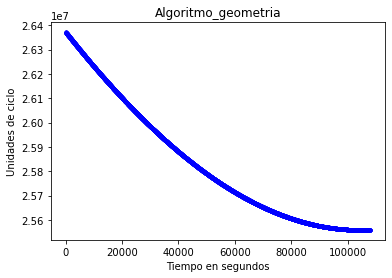

Instantes en los que se han detectado saltos de ciclo [930, 1020, 1050, 1080, 1110, 1140, 5040, 5130, 5160, 5190, 5280, 5310, 5430, 5490, 5520, 5550, 5610, 5640, 5730, 5760, 5790, 5850, 5880, 5940, 6030, 6090, 6120, 6150, 6180, 6210, 6240, 6930, 6990, 7620, 7740, 8010, 8190, 8250, 8280, 8550, 8610, 8640, 8730, 8790, 8820, 8850, 8910, 8940, 9240, 9330, 9360, 9390, 9540, 10230, 10290, 10320, 10380, 10740, 10830, 11040, 60240, 60270, 73230, 73290, 73320, 73380, 73410, 76950, 77220, 77340]


In [12]:
from polinomio import algoritmo as algoritmo_pol

N = 10
multiplo = 3
datos = f1menosf2(l1,l2)
saltos_geo = algoritmo_pol(datos,N,3,30)

print(f"Instantes en los que se han detectado saltos de ciclo {saltos_geo}")




Para `combinacion_libre_geo2` es análogo el proceso

### Combinación libre de ionosfera
Realizaremos un proceso análogo al anterior a difrencia de que los datos serán la combinación libre de ionosfera

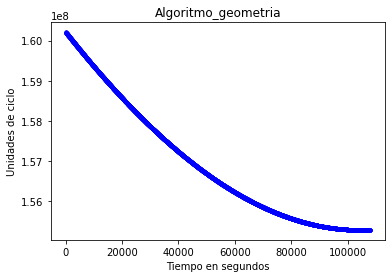

Instantes en los que se han detectado saltos de ciclo [930, 1020, 1050, 1080, 1110, 1140, 5040, 5130, 5160, 5190, 5280, 5310, 5430, 5490, 5520, 5550, 5610, 5640, 5730, 5760, 5790, 5850, 5880, 5940, 6030, 6090, 6120, 6150, 6180, 6210, 6240, 6930, 6990, 7620, 7740, 8010, 8190, 8250, 8280, 8550, 8610, 8640, 8730, 8790, 8820, 8850, 8910, 8940, 9240, 9330, 9360, 9390, 9540, 10230, 10290, 10320, 10380, 10740, 10830, 10860, 11040, 60240, 60270, 73230, 73290, 73320, 73380, 73410, 76950, 77220, 77340]


In [13]:

N = 10
multiplo = 3
datos = combinacion_libre_ios(l1, l2)
saltos_io = algoritmo_pol(datos,N,multiplo,30)
print(f"Instantes en los que se han detectado saltos de ciclo {saltos_io}")


### Comparación de saltos de la combinación libre de geometría e ionosfera
Observación: el algoritmo que se encuentra en `combinacion_geo_iono.py` realiza un proceso análogo a esto que realizaré a continuación

In [14]:
print(f"Saltos de ciclo detectados con la combinación libre de geometría son: \n{saltos_geo}\n Saltos de ciclo detectados con la combinación libre de ionosfera son: \n{saltos_io}\n")
saltos_comunes = list(set(saltos_geo) & set(saltos_io))
saltos_nocomunes = list(set(saltos_geo) ^ set(saltos_io))
print(f"\nLos  saltos de comunes a ambas combinaciones son {saltos_comunes}\n")
print(f"\nLos  saltos no comunes a ambas combinaciones son {saltos_nocomunes}")


Saltos de ciclo detectados con la combinación libre de geometría son: 
[930, 1020, 1050, 1080, 1110, 1140, 5040, 5130, 5160, 5190, 5280, 5310, 5430, 5490, 5520, 5550, 5610, 5640, 5730, 5760, 5790, 5850, 5880, 5940, 6030, 6090, 6120, 6150, 6180, 6210, 6240, 6930, 6990, 7620, 7740, 8010, 8190, 8250, 8280, 8550, 8610, 8640, 8730, 8790, 8820, 8850, 8910, 8940, 9240, 9330, 9360, 9390, 9540, 10230, 10290, 10320, 10380, 10740, 10830, 11040, 60240, 60270, 73230, 73290, 73320, 73380, 73410, 76950, 77220, 77340]
 Saltos de ciclo detectados con la combinación libre de ionosfera son: 
[930, 1020, 1050, 1080, 1110, 1140, 5040, 5130, 5160, 5190, 5280, 5310, 5430, 5490, 5520, 5550, 5610, 5640, 5730, 5760, 5790, 5850, 5880, 5940, 6030, 6090, 6120, 6150, 6180, 6210, 6240, 6930, 6990, 7620, 7740, 8010, 8190, 8250, 8280, 8550, 8610, 8640, 8730, 8790, 8820, 8850, 8910, 8940, 9240, 9330, 9360, 9390, 9540, 10230, 10290, 10320, 10380, 10740, 10830, 10860, 11040, 60240, 60270, 73230, 73290, 73320, 73380, 7341

**Ahora podríamos realizar un estudio sobre esos valores para ver que sucede con esos valores**

### Algoritmo basado en clustering
La idea es analizar los saltos de ciclo en función de los clústers

En este algoritmo incluimos las siguientes variables:
1. Datos 
2. Número de muestras a tomar 
3. Tiempo

Observación: el umbral lo elige el algoritmo en función del coeficiente de Silhouette

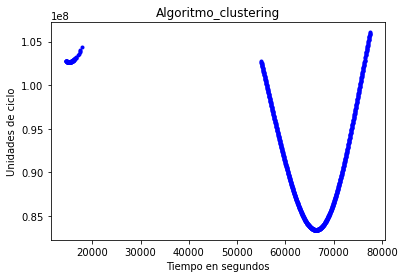

SALTO DE CICLO
SALTO DE CICLO


[14610, 77460]

In [16]:
from clustering import algoritmo as algoritmo_clustering

Teruel = "datos//TERU042A00.23O"
sat = 'G16'
N = 50
datos = L2(Teruel,sat)
algoritmo_clustering(datos,N,30)

### Algoritmo basado en regresión lineal

Este método tiene 3 variables:

1. datos, donde tenemos que insertar los datos sobre la frecuencia o combinación de frecuencias.
2. Numero de muestras a tomar por el algoritmo. 
3. El umbral es la media + 2 veces la desviación típica
4. tiempo


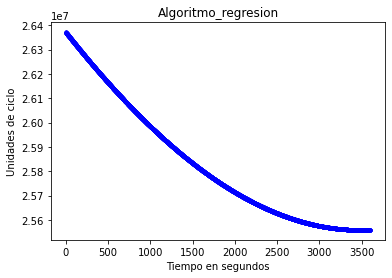

[161, 171, 201, 260, 311, 340, 361, 2171]

In [8]:
from regresion2 import algoritmo as alg_reg
Granada = 'datos/GRA1065Q00.23O'
sat = 'G23' 
l1 = L1(Granada , sat)
l2 = L2(Granada, sat)
datos = f1menosf2(l1,l2)
paso = 10
saltos = alg_reg(datos,paso,1)
saltos 

Ahora vamos a verificar esos saltos con un contraste de hipótesis

1. datos
2. paso
3. lista_saltos

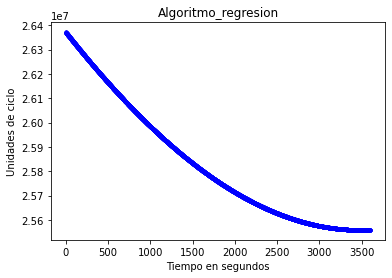

[False, True, True, True, True, True, False, False]

In [9]:
from contraste2 import comprobacion 
comprobacion(datos,20,saltos)

### Algoritmo basado en filtro promedio con umbral relacionado con MAD y desviación típica

Este método tiene 4 variables 

1. seleccion, si es 0 toma un umbral relacionado con MAD y 1 para desviación típica
2. datos
3. window_size
4. multiplo
5. tiempo 

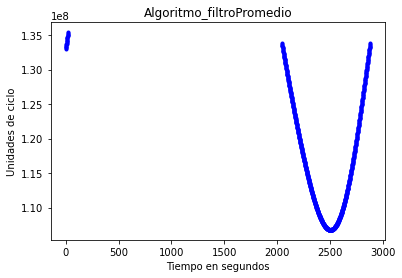

[10, 21, 2054, 2074, 2085, 2487, 2498, 2509, 2520, 2531, 2542, 2553, 2564]

In [10]:
from filtropromedio import algoritmo as al_fil
Teruel = "datos/TERU042A00.23O"
sat = 'G08'
seleccion = 0
datos = L1(Teruel, sat)
window_size = 10
multiplo = 2
tiempo = 1
al_fil(seleccion, datos, window_size, multiplo, tiempo)

**Hacemos lo mismo para seleccion = 1**

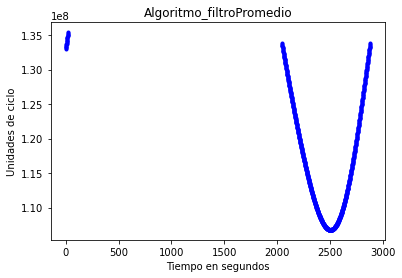

[11, 22, 2495, 2506, 2517]

In [11]:
from filtropromedio import algoritmo as al_fil
Teruel = "datos/TERU042A00.23O"
sat = 'G08'
seleccion = 1
datos = L1(Teruel, sat)
window_size = 10
multiplo = 2
tiempo = 1
al_fil(seleccion, datos, window_size, multiplo, tiempo)